[View in Colaboratory](https://colab.research.google.com/github/aksh98/FintechProject/blob/master/OES_Fintech.ipynb)

In [1]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [3]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
Please enter the verification code: Access token retrieved correctly.


In [0]:
!mkdir -p drive
!google-drive-ocamlfuse drive

In [0]:
from os import path
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())

accelerator = 'cu80' if path.exists('/opt/bin/nvidia-smi') else 'cpu'

In [3]:
%cd drive
%cd Colab Notebooks/FintechProject
# !ls -l | wc -l
# %cd .
!ls

/content/drive
/content/drive/Colab Notebooks/FintechProject
2d_4_17.csv  Fintech_16may.ipynb  OES_3_00_17
3d_4_17.csv  OES_2_00_17	  OES_Fintech.ipynb


In [7]:
!pip install xlrd
!pip install xlwt
import xlrd
import xlwt
import os


  Cache entry deserialization failed, entry ignored
  Using cached https://files.pythonhosted.org/packages/07/e6/e95c4eec6221bfd8528bcc4ea252a850bffcc4be88ebc367e23a1a84b0bb/xlrd-1.1.0-py2.py3-none-any.whl
  Cache entry deserialization failed, entry ignored
  Using cached https://files.pythonhosted.org/packages/44/48/def306413b25c3d01753603b1a222a011b8621aed27cd7f89cbc27e6b0f4/xlwt-1.3.0-py2.py3-none-any.whl


In [8]:
## CODE
import re

path = "/content/drive/Colab Notebooks/FintechProject/OES_2_00_17/"
files = os.listdir(path)
table = []
flag = 0
for i in files:
  
  if(i == ".DS_Store" or i == "nat4d_2002_dl.xls" or i == "nat2d_sic_2000_dl.xls" or i == "nat2d_sic_2001.xls" or i == "nat3d_may2003_dl.xls"):
    continue
  else:
    # Open workbook --- 
    path_sh = str(path)+str(i)

    workbook = xlrd.open_workbook(path_sh)
    worksheet = workbook.sheet_by_index(0)
        
    num_rows = worksheet.nrows
    num_cols = worksheet.ncols
    print(i,"           Size of the sheet: ",num_rows,num_cols)

#------ extracting year from the data-------------
    for s in i.split("_"):
      m = re.search(r'\d+$', s)
      if(m):
        yr = m.group()
      
    print(yr)
    
#------ read the files --------------------------      
    if(num_cols == 25):
      for x in range(1,num_rows):
        record = []
        for y in range(num_cols+1):
          if(y == 0):
            record.append(yr)
          elif(y != 3):
            record.append(worksheet.cell(x,y-1).value)
        table.append(record)

    else: 
      
      if(flag == 0):
        record = []
        for j in range(num_cols+1):
          if(j==0):
            record.append('year')
          else:
            record.append(worksheet.cell(0,j-1).value)
        table.append(record)
        flag = 1
      for x in range(1,num_rows):
        record = []
        for y in range(num_cols+1):
          if(y == 0):
            record.append(yr)
          else:
            record.append(worksheet.cell(x,y-1).value)
        table.append(record)
           

natsector_M2004_dl.xls            Size of the sheet:  9165 24
2004
natsector_M2005_dl.xls            Size of the sheet:  8940 24
2005
natsector_M2006_dl.xls            Size of the sheet:  8755 24
2006
natsector_M2008_dl.xls            Size of the sheet:  8662 24
2008
natsector_M2009_dl.xls            Size of the sheet:  8534 24
2009
natsector_M2010_dl.xls            Size of the sheet:  8439 24
2010
natsector_M2012_dl.xls            Size of the sheet:  15833 24
2012
natsector_M2013_dl.xls            Size of the sheet:  15922 24
2013
natsector_M2014_dl.xlsx            Size of the sheet:  15954 24
2014
natsector_M2015_dl.xlsx            Size of the sheet:  16101 24
2015
natsector_M2016_dl.xlsx            Size of the sheet:  16201 24
2016
natsector_M2017_dl.xlsx            Size of the sheet:  16156 24
2017
natsector_M2011_dl.xlsx            Size of the sheet:  8438 24
2011
natsector_M2007_dl.xls            Size of the sheet:  8736 24
2007


In [15]:
# PRINT STATEMENTS - (TEST)
print(len(table),len(table[1]))
print(table[0])
print(table[52499])
for i in range(len(table)):
  if(len(table[i]) != 25):
    print(i, (len(table[i])))
    

165823 25
['year', 'NAICS', 'NAICS_TITLE', 'OCC_CODE', 'OCC_TITLE', 'GROUP', 'TOT_EMP', 'EMP_PRSE', 'PCT_TOTAL', 'PCT_RPT', 'H_MEAN', 'A_MEAN', 'MEAN_PRSE', 'H_PCT10', 'H_PCT25', 'H_MEDIAN', 'H_PCT75', 'H_PCT90', 'A_PCT10', 'A_PCT25', 'A_MEDIAN', 'A_PCT75', 'A_PCT90', 'ANNUAL', 'HOURLY']
['2012', '11', 'Agriculture, Forestry, Fishing and Hunting', '11-2022', 'Sales Managers', 'detailed', 270.0, 10.6, 0.07, 1.0, 57.28, 119140.0, 7.3, 24.2, 34.26, 51.96, 71.33, '#', 50340.0, 71270.0, 108070.0, 148360.0, '#', '', '']


In [31]:
## SAVE THE FILE IN CSV FORMAT
## ------- USING PANDAS --------------

import numpy as np
import pandas as pd

npa = np.asarray(table)
df = pd.DataFrame(data=npa[1:,0:],    # values
#              index=npa[1:,0],    # 1st column as index
             columns=npa[0,0:])  # 1st row as the column names

df.info()
df = df.replace("*",np.nan)
df = df.replace("**",np.nan)
df = df.replace("#",np.nan)
df = df.replace("~",np.nan)

df.to_csv('2dout.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165822 entries, 0 to 165821
Data columns (total 25 columns):
year           165822 non-null object
NAICS          165822 non-null object
NAICS_TITLE    165822 non-null object
OCC_CODE       165822 non-null object
OCC_TITLE      165822 non-null object
GROUP          165822 non-null object
TOT_EMP        165822 non-null object
EMP_PRSE       165822 non-null object
PCT_TOTAL      165822 non-null object
PCT_RPT        165822 non-null object
H_MEAN         165822 non-null object
A_MEAN         165822 non-null object
MEAN_PRSE      165822 non-null object
H_PCT10        165822 non-null object
H_PCT25        165822 non-null object
H_MEDIAN       165822 non-null object
H_PCT75        165822 non-null object
H_PCT90        165822 non-null object
A_PCT10        165822 non-null object
A_PCT25        165822 non-null object
A_MEDIAN       165822 non-null object
A_PCT75        165822 non-null object
A_PCT90        165822 non-null object
ANNUAL         

In [61]:
# PANDAS

print(npa.shape)
# READ CSV FILE
files = pd.read_csv("2dout.csv")

files.head()


# SHEET NaNs
# *  = indicates that a wage estimate is not available    
# # = indicates a wage that is equal to or greater than $100.00 per hour or $208,000 per year    
# ** = indicates that an employment estimate is not available
# ~ = indicates that the percent of establishments reporting the occupation is less than 0.5%


# --------data modification - change nans -------

# for x in range(num_rows):
#   record = []
#   for y in range(num_cols):      
#     if(worksheet.cell(x,y).value == '*'):
#       record.append('')
#     if(worksheet.cell(x,y).value == '**'):
#       record.append('')
#     if(worksheet.cell(x,y).value == '#' and y > 15 and y < 21): #a
#       record.append('')
#     if(worksheet.cell(x,y).value == '#' and y > 10 and y < 16): #h
#       record.append('')
#     if(worksheet.cell(x,y).value == '~'):
#       record.append('')
# # --------^^^-------
#     else:   
#       record.append(worksheet.cell(x,y).value)
  
#   record.append('0')
#   table.append(record)
  
  

(165823, 25)


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2,12,13,19,20,21,22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,year,NAICS,NAICS_TITLE,OCC_CODE,OCC_TITLE,GROUP,TOT_EMP,EMP_PRSE,PCT_TOTAL,...,H_MEDIAN,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90,ANNUAL,HOURLY
0,0,2004,11,"Agriculture, Forestry, Fishing, and Hunting",00-0000,Industry Total,NaN,380350.0,1.0,100.00,...,8.27,11.31,16.93,13610,15020,17200,23520,35220,NaN,NaN
1,1,2004,11,"Agriculture, Forestry, Fishing, and Hunting",11-0000,Management occupations,major,7390.0,4.5,1.94,...,28.84,43.96,67.49,32560,43440,59980,91440,140370,NaN,NaN
2,2,2004,11,"Agriculture, Forestry, Fishing, and Hunting",11-1011,Chief executives,NaN,720.0,17.8,0.19,...,46.77,NaN,NaN,49760,66000,97270,NaN,NaN,NaN,NaN
3,3,2004,11,"Agriculture, Forestry, Fishing, and Hunting",11-1021,General and operations managers,NaN,3510.0,4.8,0.92,...,30.55,46.93,69.18,34480,45840,63540,97610,143900,NaN,NaN
4,4,2004,11,"Agriculture, Forestry, Fishing, and Hunting",11-2011,Advertising and promotions managers,NaN,60.0,11.8,0.02,...,22.51,34.23,46.86,25200,32630,46820,71200,97470,NaN,NaN


In [36]:
files['OCC_CODE'].dtype

dtype('O')

In [51]:
# ============ FOR INCONSISTENT DATA =====================================================

# # reduce by: 10000
# naic = 10000
# for x in range(1,num_rows):
#   for i in range(x,num_rows):
    
#     if(table[x][22] == '0'):
#       if(int(table[x][0])/naic == int(table[i][0])/naic):
#         if(table[x][2] == table[i][2]):
#           table[x][4] = int(table[x][4]) + int(table[i][4])
#           for j in range(4,num_cols-1):
#             table[x][j] = (int(table[x][j])*int(table[x][22]) + int(table[i][5]))/(int(table[x][22])+1)
#             table[x][22] = int(table[x][22]) + 1
            
# files["OCC_CODE"].head()
fil = files["NAICS"] == "11"
fi = files[fil]
fi.head()

,Unnamed: 0,year,NAICS,NAICS_TITLE,OCC_CODE,OCC_TITLE,GROUP,TOT_EMP,EMP_PRSE,PCT_TOTAL,...,H_MEDIAN,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90,ANNUAL,HOURLY
0,0,2004,11,"Agriculture, Forestry, Fishing, and Hunting",00-0000,Industry Total,NaN,380350.0,1.0,100.00,...,8.27,11.31,16.93,13610,15020,17200,23520,35220,NaN,NaN
1,1,2004,11,"Agriculture, Forestry, Fishing, and Hunting",11-0000,Management occupations,major,7390.0,4.5,1.94,...,28.84,43.96,67.49,32560,43440,59980,91440,140370,NaN,NaN
2,2,2004,11,"Agriculture, Forestry, Fishing, and Hunting",11-1011,Chief executives,NaN,720.0,17.8,0.19,...,46.77,NaN,NaN,49760,66000,97270,NaN,NaN,NaN,NaN
3,3,2004,11,"Agriculture, Forestry, Fishing, and Hunting",11-1021,General and operations managers,NaN,3510.0,4.8,0.92,...,30.55,46.93,69.18,34480,45840,63540,97610,143900,NaN,NaN
4,4,2004,11,"Agriculture, Forestry, Fishing, and Hunting",11-2011,Advertising and promotions managers,NaN,60.0,11.8,0.02,...,22.51,34.23,46.86,25200,32630,46820,71200,97470,NaN,NaN


In [68]:
## -------------------------------------------------------------------------
## -------------------------------------------------------------------------

%matplotlib inline

try_filter = (files["OCC_CODE"] == "00-0000") & (files["NAICS"] == "11")
filtered_out = files[try_filter]
# filtered_out.head()


sort_by_yr = filtered_out.sort_values('year')
sort_by_yr.tail()
sort_by_yr.index = sort_by_yr["year"]


,Unnamed: 0,year,NAICS,NAICS_TITLE,OCC_CODE,OCC_TITLE,GROUP,TOT_EMP,EMP_PRSE,PCT_TOTAL,...,H_MEDIAN,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90,ANNUAL,HOURLY
68321,68321,2013,11,"Agriculture, Forestry, Fishing and Hunting",00-0000,Industry Total,total,404040.0,0.9,100.0,...,9.43,13.67,20.60,17370,18230,19610,28430,42840,NaN,NaN
84242,84242,2014,11,"Agriculture, Forestry, Fishing and Hunting",00-0000,Industry Total,total,409720.0,1.0,100.0,...,9.70,14.18,21.17,17480,18410,20180,29480,44040,NaN,NaN
100195,100195,2015,11,"Agriculture, Forestry, Fishing and Hunting",00-0000,Industry Total,total,412150.0,1.1,100.0,...,10.52,14.85,21.93,18930,19370,21890,30880,45610,NaN,NaN
116295,116295,2016,11,"Agriculture, Forestry, Fishing and Hunting",00-0000,Industry Total,total,416600.0,1.2,100.0,...,11.36,15.41,22.70,20040,20820,23630,32040,47210,NaN,NaN
132495,132495,2017,11,"Agriculture, Forestry, Fishing and Hunting",00-0000,Industry Total,total,424020.0,1.1,100.0,...,11.77,16.12,23.35,21070,21980,24480,33530,48570,NaN,NaN


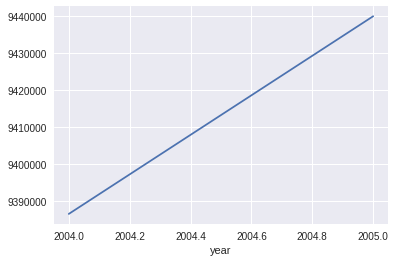

In [99]:
ts = pd.Series(sort_by_yr["TOT_EMP"]) #y = sort_by_yr["year"])

plt.figure()
ts.plot()


In [0]:
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


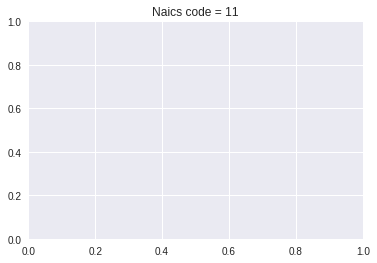

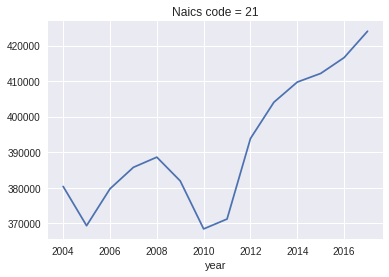

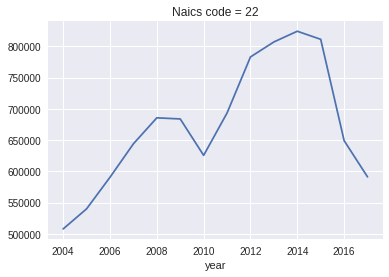

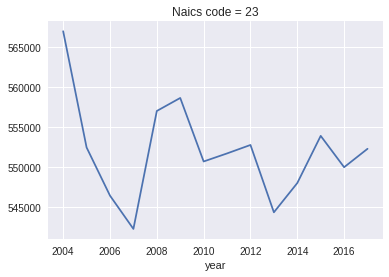

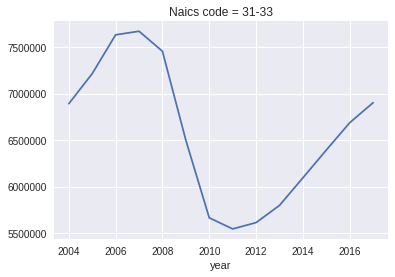

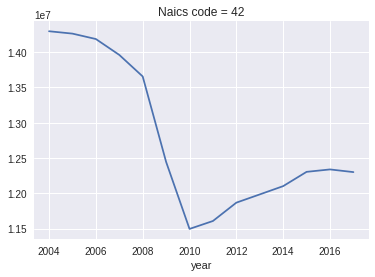

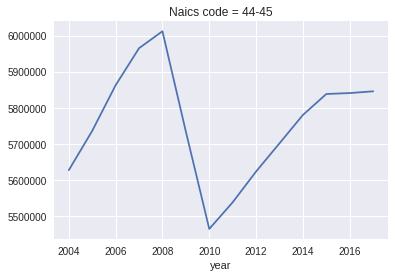

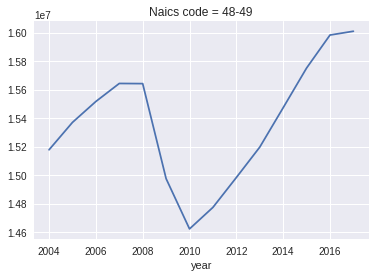

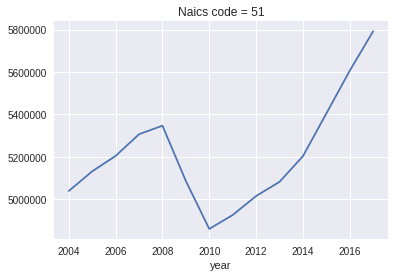

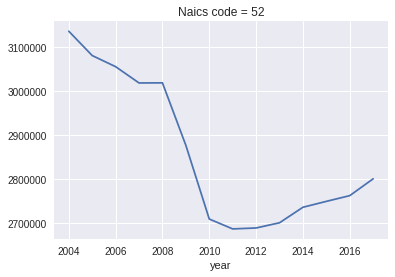

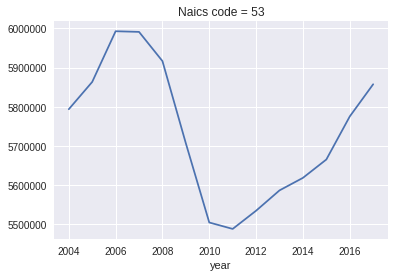

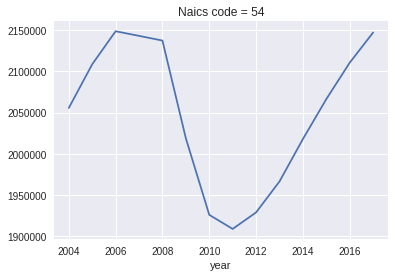

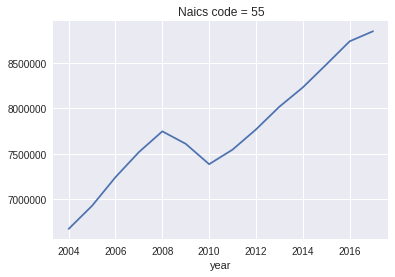

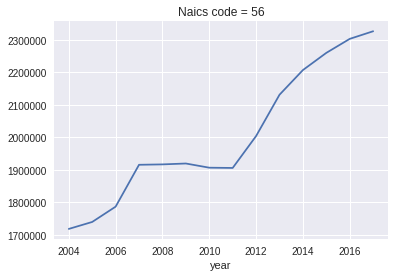

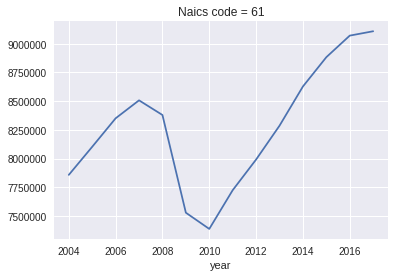

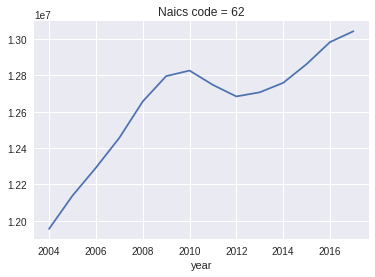

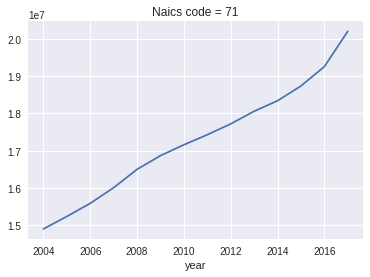

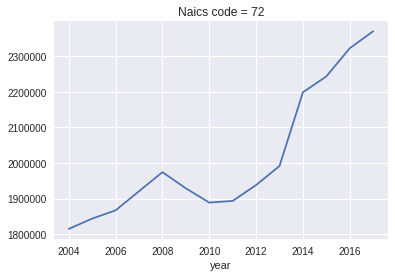

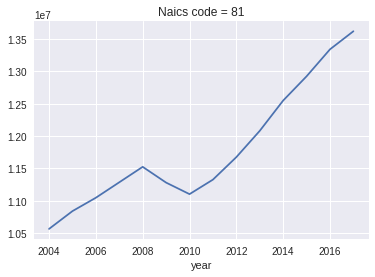

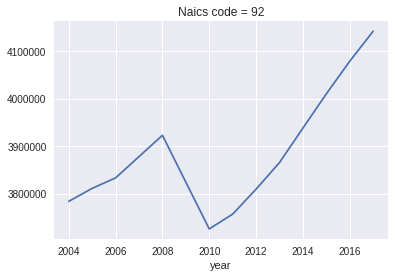

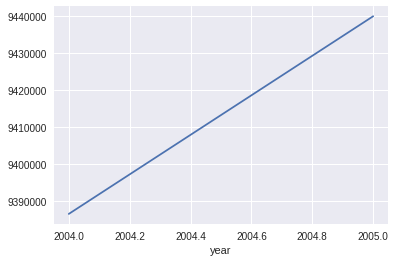

In [117]:
%matplotlib inline

array = ["11","21","22","23","31-33","42","44-45","48-49","51","52","53","54","55","56","61","62","71","72","81","92"]

# try_filter = (files["OCC_CODE"] == "00-0000") & (files["NAICS"] == "11")
# filtered_out = files[try_filter]

# index=ts.index, columns=list('ABCD')

for i in range(len(array)):
    filtered = (files["OCC_CODE"] == "00-0000") & (files["NAICS"] == str(array[i]))
    filtered_out = files[filtered]
    sort_by_yr = filtered_out.sort_values('year')
    sort_by_yr.tail()
    sort_by_yr.index = sort_by_yr["year"]
    ts = pd.Series(sort_by_yr["TOT_EMP"])
    
    plt.title("Naics code = "+ str(array[i]))
    plt.grid(True)

    plt.figure(); ts.plot();
    
plt.show()
# sort_by_yr = filtered_out.sort_values('year')
# sort_by_yr.tail()
# sort_by_yr.index = sort_by_yr["year"]


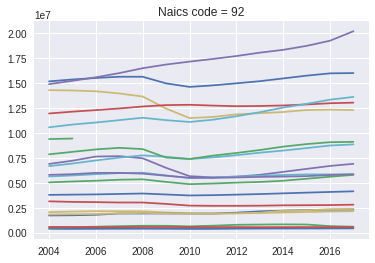

In [109]:
%matplotlib inline

array = ["11","21","22","23","31-33","42","44-45","48-49","51","52","53","54","55","56","61","62","71","72","81","92"]

# try_filter = (files["OCC_CODE"] == "00-0000") & (files["NAICS"] == "11")
# filtered_out = files[try_filter]

# index=ts.index, columns=list('ABCD')
plt.figure(1)
for i in range(len(array)):
    filtered = (files["OCC_CODE"] == "00-0000") & (files["NAICS"] == str(array[i]))
    filtered_out = files[filtered]
    sort_by_yr = filtered_out.sort_values('year')
#     sort_by_yr.tail()
    sort_by_yr.index = sort_by_yr["year"]
    ts = pd.Series(sort_by_yr["TOT_EMP"])
#     plt.yscale('linear')
#     plt.axis([2004, 2017, 10000, 20000000])
    plt.title("Naics code = "+ str(array[i]))
    plt.grid(True)
    plt.plot(ts,label = str(array[i]));
    
    plt.show()
# sort_by_yr = filtered_out.sort_values('year')
# sort_by_yr.tail()
# sort_by_yr.index = sort_by_yr["year"]
